# Geothermal Heat Flux
**Description:**  
Geothermal heat flux estimates from various sources for Antarctica, both point-measurements and regional gridded data. 

**Datasets:** 

Martos, Yasmina M. “Antarctic Geothermal Heat Flux Distribution and Estimated Curie Depths, Links to Gridded Files.” Supplement to: Martos, Yasmina M; Catalán, Manuel; Jordan, Tom A; Golynsky, Alexander V; Golynsky, Dmitry A; Eagles, Graeme; Vaughan, David G (2017): Heat Flux Distribution of Antarctica Unveiled. Geophysical Research Letters, 44(22), 11417-11426, Https://Doi.Org/10.1002/2017GL075609. PANGAEA, 2017. https://doi.org/10.1594/PANGAEA.882503.

Lösing, Mareen, and Jörg Ebbing. “Predicted Antarctic Heat Flow and Uncertainties Using Machine Learning.” PANGAEA, 2021. https://doi.org/10.1594/PANGAEA.930237.

Stål, Tobias, Anya M. Reading, Jacqueline A. Halpin, and Joanne Whittaker. “Antarctic Geothermal Heat Flow Model: Aq1.” PANGAEA, 2020. https://doi.org/10.1594/PANGAEA.924857.

**Associated papers:**

An, Meijian, Douglas A. Wiens, Yue Zhao, Mei Feng, Andrew Nyblade, Masaki Kanao, Yuansheng Li, Alessia Maggi, and Jean‐Jacques Lévêque. “Temperature, Lithosphere‐asthenosphere Boundary, and Heat Flux beneath the Antarctic Plate Inferred from Seismic Velocities.” Journal of Geophysical Research: Solid Earth 120, no. 12 (December 2015): 8720–42. https://doi.org/10.1002/2015JB011917.

Martos, Yasmina M., Manuel Catalán, T. A. Jordan, Alexander Golynsky, Dmitry Golynsky, Graeme Eagles, and David G. Vaughan. “Heat Flux Distribution of Antarctica Unveiled.” Geophysical Research Letters 44 (November 28, 2017): 1–10. https://doi.org/10.1002/2017GL075609.

Burton-Johnson, Alex, Ricarda Dziadek, and Carlos Martin. “Geothermal Heat Flow in Antarctica: Current and Future Directions.” The Cryosphere Discussions, 2020, 1–45. https://doi.org/10.5194/tc-2020-59.

Lösing, M., and J. Ebbing. “Predicting Geothermal Heat Flow in Antarctica With a Machine Learning Approach.” Journal of Geophysical Research: Solid Earth 126, no. 6 (June 2021). https://doi.org/10.1029/2020JB021499.

Stål, Tobias, Anya M. Reading, Jacqueline A. Halpin, and Joanne M. Whittaker. “Antarctic Geothermal Heat Flow Model: Aq1.” Geochemistry, Geophysics, Geosystems 22, no. 2 (February 2021). https://doi.org/10.1029/2020GC009428.

Shen, Weisen, Douglas A. Wiens, Andrew J. Lloyd, and Andrew A. Nyblade. “A Geothermal Heat Flux Map of Antarctica Empirically Constrained by Seismic Structure.” Geophysical Research Letters 47, no. 14 (2020). https://doi.org/10.1029/2020GL086955.


In [2]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions, utils

In [3]:
version_names = [
    "an-2015",
    "martos-2017",
    "burton-johnson-2020",
    "losing-ebbing-2021",
    "aq1",
    "shen-2020",
]

grids = []
for name in version_names:
    data = fetch.ghf(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for an-2015
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 26.5547351837
grid zmax: 102.389022827
grid registration: g
##########
Info for martos-2017
grid spacing: 15000.0 m
grid region: (-2535000.0, 2715000.0, -2130000.0, 2220000.0)
grid zmin: 42.6263694763
grid zmax: 240.510910034
grid registration: g
##########
Info for burton-johnson-2020
grid spacing: 17000.0 m
grid region: (-2543500.0, 2624500.0, -2121500.0, 2213500.0)
grid zmin: 42.2533454895
grid zmax: 106.544433594
grid registration: p
##########
Info for losing-ebbing-2021
grid spacing: 5000.0 m
grid region: (-2990000.0, 2990000.0, -2990000.0, 2990000.0)
grid zmin: 24.609621048
grid zmax: 144.53793335
grid registration: g
##########
Info for aq1
grid spacing: 20071.6845878 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: 18.9787025452
grid zmax: 220.017990112
grid registration: g
##########
Info for shen-2020
grid spacing: 10000.0 m
grid region: (-28

/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:657: RuntimeWarning: The definition of projected CRS EPSG:3031 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)
/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1673: RuntimeWarning: Grid may have irregular spacing in the 'X' dimension, but GMT only supports regular spacing. Calculated regular spacing 20071.685546875 is assumed in the 'X' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1673: RuntimeWarning:

In [4]:
burton_johnson_points = fetch.ghf(
    version="burton-johnson-2020",
    points=True,
)
burton_johnson_points

,lat,lon,Station ID,top (m),bot (m),grad,k(W/mK),GHF,err,Elevation (m.a.s.l.),Reference,DOI,DataQuality,Method,Comment,x,y
27,-84.436800,-162.859100,WGZ,0.2,1.4,,1.77,88.0,7,NaN,Begeman2017,https://doi.org/10.1002/2017gl075579,S1,Unconsolidated sediments,3 km downstream of the Whillans ice stream Gro...,-1.782810e+05,-5.780430e+05
28,-76.066700,164.883300,ANT008St6,2.0,3.4,98,0.68,66.3,5.2,-912.0,Blackman1987,https://doi.org/10.1594/PANGAEA.802482,S2,Unconsolidated sediments,NaN,3.966790e+05,-1.468456e+06
29,-74.483300,168.166700,ANT009ST9,1.0,3.4,108,0.73,73.3,11.7,-909.0,Blackman1987,https://doi.org/10.1594/PANGAEA.802482,S2,Unconsolidated sediments,NaN,3.477678e+05,-1.659851e+06
30,-77.850000,166.675000,DVDP-3/Ross Island,220.0,260,45,2.01,92.0,NaN,48.0,Bucher1980,https://doi.pangaea.de/10.1594/PANGAEA.806603,R2,Bedrock borehole,NaN,3.053547e+05,-1.289228e+06
31,-77.850000,166.675000,DVDP-3/Ross Island,160.0,220,37,2.26,84.0,NaN,48.0,Bucher1980,https://doi.pangaea.de/10.1594/PANGAEA.806603,R2,Bedrock borehole,NaN,3.053547e+05,-1.289228e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-77.089333,164.498861,CIROS-1,150.0,600,40,2,80.0,,NaN,White1989,https://doi.org/10.1594/PANGAEA.807847,R2,Bedrock borehole,NaN,3.764326e+05,-1.357267e+06
433,-66.033333,-64.066667,"LARISSA Site Beta, Bruce Plateau",2.5,420.94,,NaN,80.0,,NaN,Zagorodnov2012,https://doi.org/10.5194/tc-6-675-2012,I2,Ice borehole,NaN,-2.375194e+06,1.155040e+06
438,-70.650000,-21.583300,IO15-39,NaN,10,,0.98,60.0,,-4398.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S2,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-7.805228e+05,1.973056e+06
439,-69.983300,-26.050000,IO15-40,NaN,5,,0.96,84.0,,-4549.0,Zlotnicki1980,https://doi.org/10.1029/GL007i006p00421,S1,Unconsolidated sediments,bot (m) from depths in https://doi.org/10.1029...,-9.645445e+05,1.973237e+06


/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:657: RuntimeWarning: The definition of projected CRS EPSG:3031 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)
/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1673: RuntimeWarning: Grid may have irregular spacing in the 'X' dimension, but GMT only supports regular spacing. Calculated regular spacing 20071.685546875 is assumed in the 'X' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
/home/mattd/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:1673: RuntimeWarning:

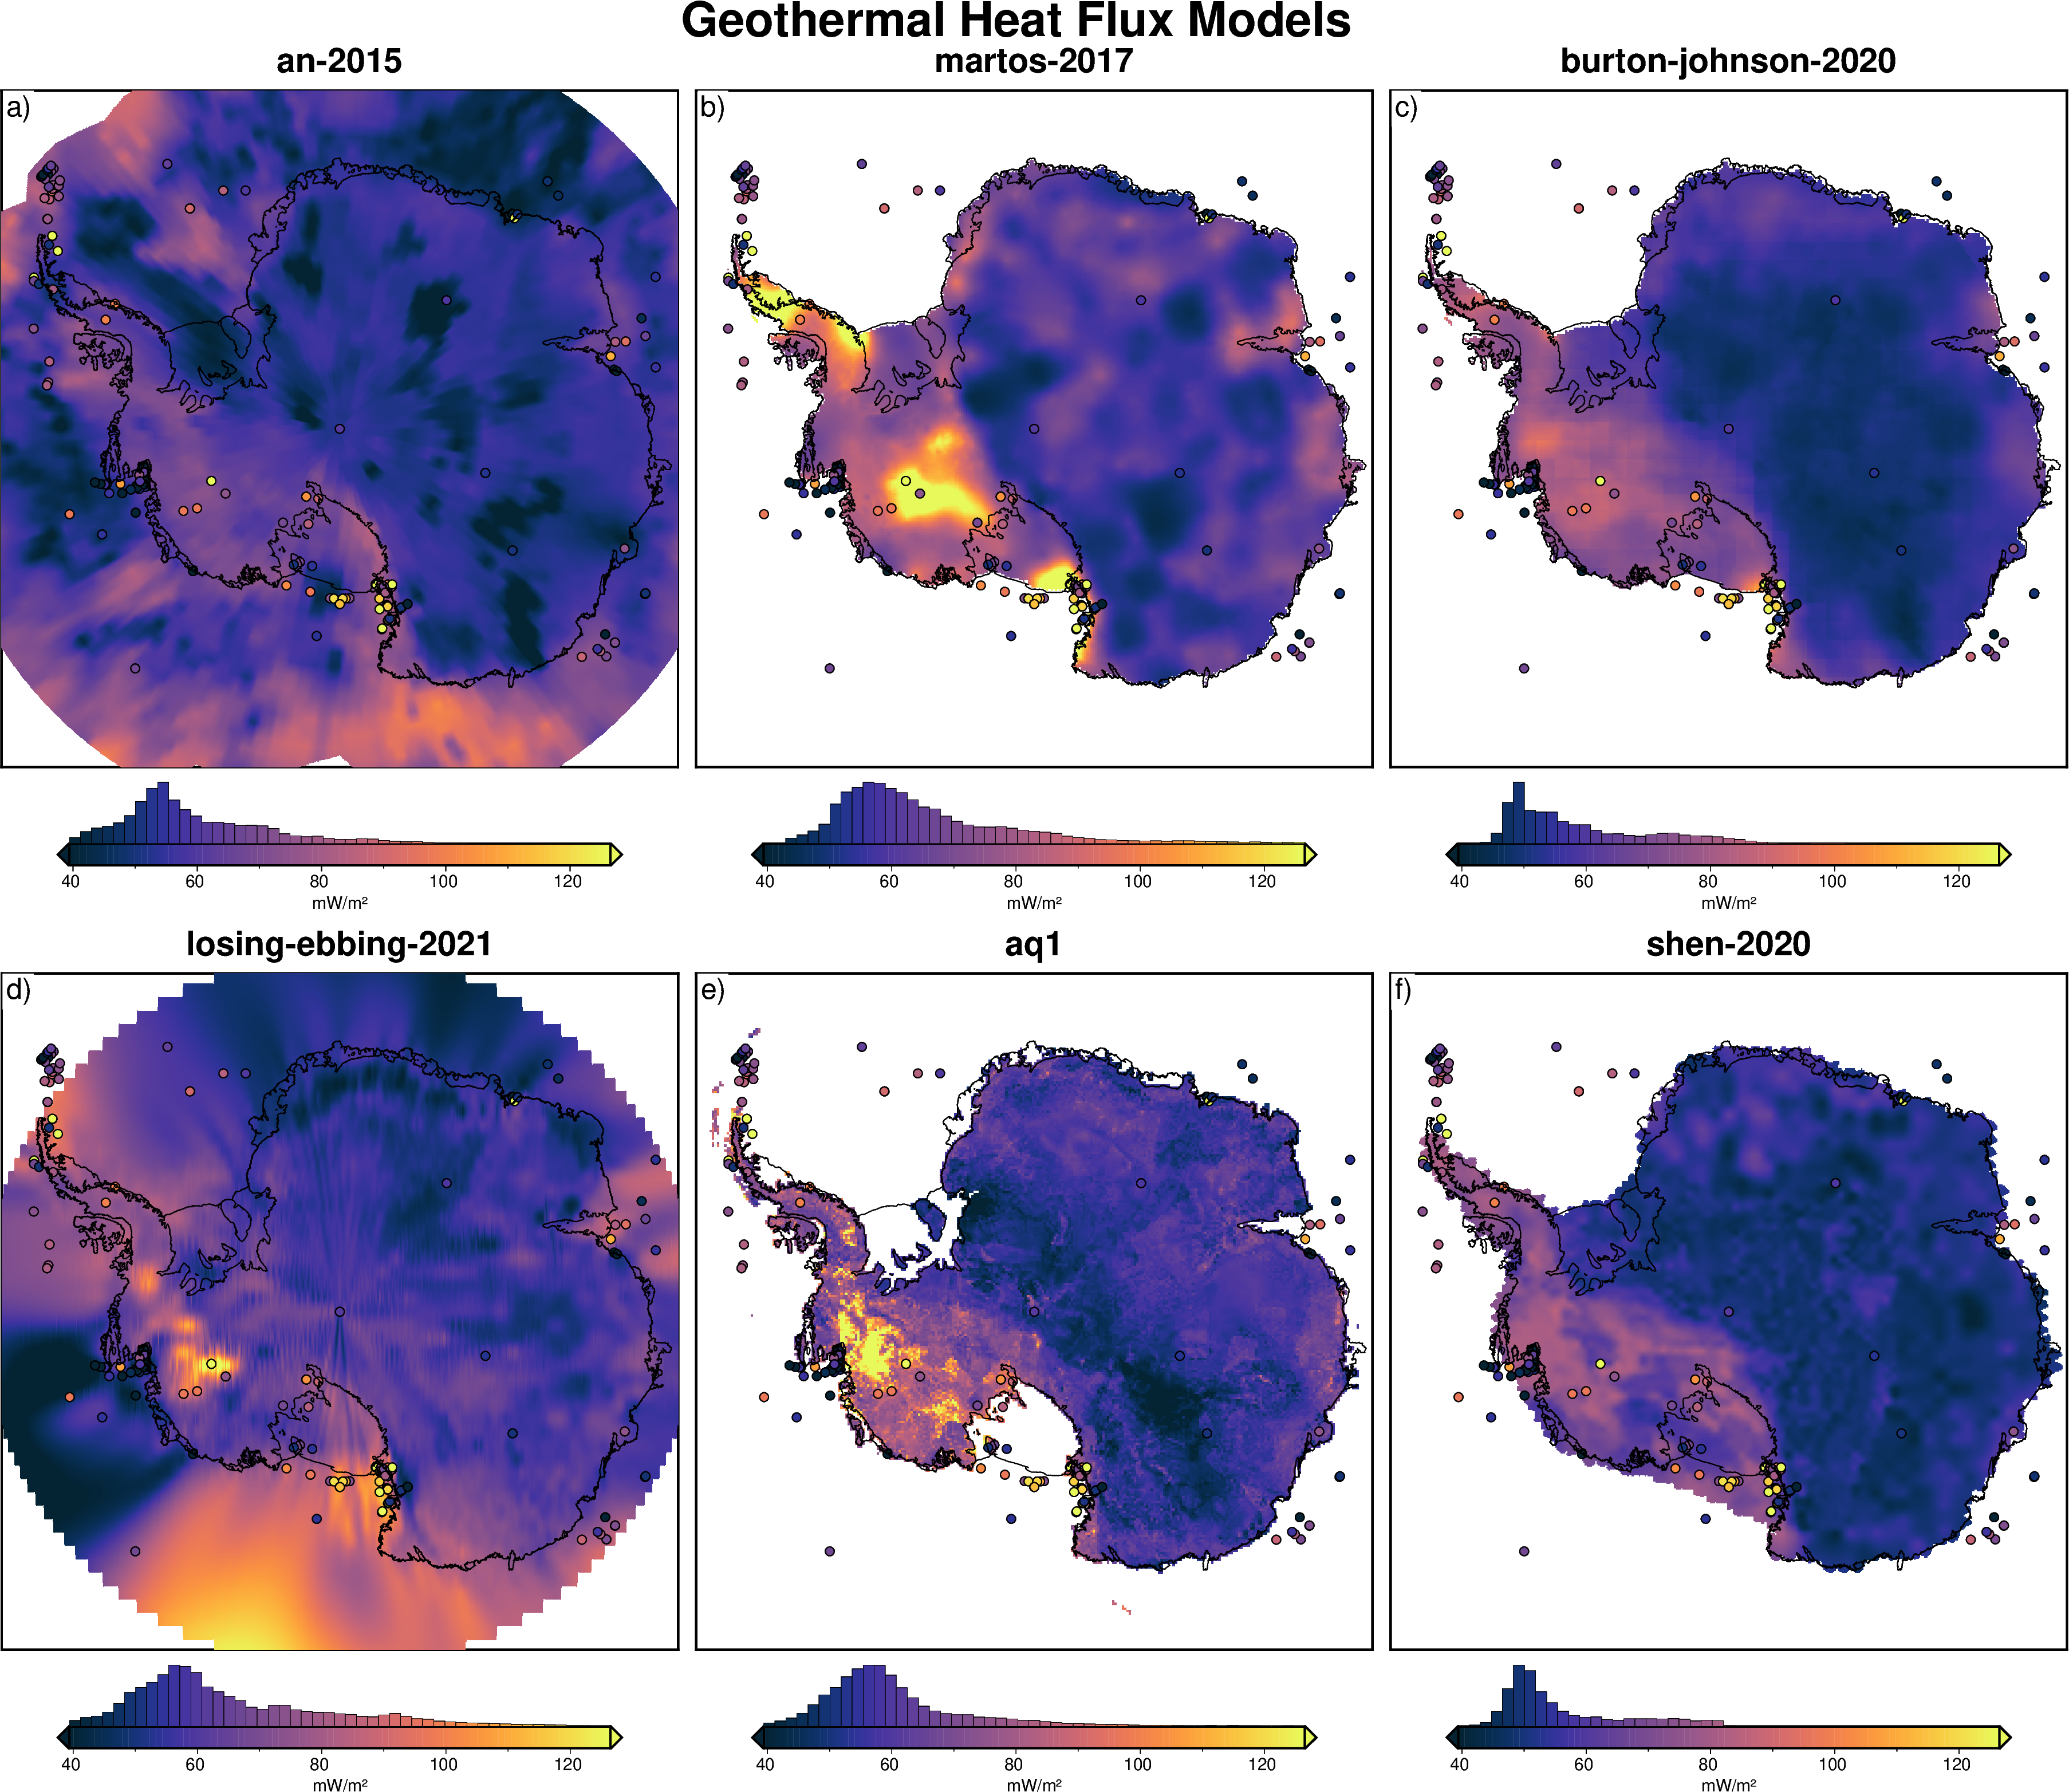

In [5]:
cpt_lims = utils.get_combined_min_max(grids, robust=True)

fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Geothermal Heat Flux Models",
    titles=version_names,
    cbar_label="mW/m²",
    coast=True,
    cmap="thermal",
    cpt_lims=cpt_lims,
    hemisphere="south",
    points=burton_johnson_points,
    points_cmap=True,
    points_fill="GHF",
    points_pen=".6p,black",
    hist=True,
)

fig.show(dpi=200)